In [5]:
import pandas as pd
import random
import os
import shutil

import seaborn as seaborn

# Chemins des fichiers
tsv_file_path = "C:\\Users\\axlco\\Downloads\\common_voice\\cv-corpus-14.0-delta-2023-06-23\\en\\validated.tsv"
source_directory = "C:\\Users\\axlco\\Downloads\\common_voice\\cv-corpus-14.0-delta-2023-06-23\\en\\clips"
output_directory = "C:\\Users\\axlco\\OneDrive - ESME\\ESME Sudria\\5 ème année\\Projet\\samples_with_age"

# Lire le fichier TSV
df = pd.read_csv(tsv_file_path, sep='\t')

# Catégories d'âge
age_categories = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties']

# Filtrer les fichiers audio correspondant aux catégories d'âge
filtered_files = df[df['age'].isin(age_categories)]


# Créer le répertoire de sortie s'il n'existe pas
os.makedirs(output_directory, exist_ok=True)

# Copier les fichiers vers le répertoire de sortie et créer le DataFrame
selected_files = []

for index, row in filtered_files.iterrows():
    file = row['path']
    source_path = os.path.join(source_directory, file)
    destination_path = os.path.join(output_directory, os.path.basename(file))

    # Copier le fichier vers le répertoire de sortie
    shutil.copyfile(source_path, destination_path)

    # Ajouter les informations au DataFrame
    selected_files.append(row)


# Créer le DataFrame
selected_df = pd.DataFrame(selected_files)

# Afficher le nombre de fichiers copiés
print(f"{len(selected_files)} fichiers ont été copiés avec succès vers {output_directory}.")

# Afficher le DataFrame avec les caractéristiques demandées
print(selected_df[['client_id', 'path', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accents', 'variant', 'locale', 'segment']])


3496 fichiers ont été copiés avec succès vers C:\Users\axlco\OneDrive - ESME\ESME Sudria\5 ème année\Projet\samples_with_age.
                                              client_id  \
19    1d6e4bc98ac6b2bc78bb86c444cdc9858288a720a7ffa3...   
23    1ed08d5d71e18d16c8707b187713464a7e07e17364c7cf...   
24    203ffbcab8c5cfd92e21c94fa9eb3350edc7d3847e3354...   
27    23c57e2ba3e0918e44855a5f5b080ad3686f9f77d4c9f6...   
29    27459c808cb85beb517547e1444c4b4a8fbae2e6dde9d7...   
...                                                 ...   
4029  ab43bbde8dd98948b7e6b8393d966519e92744fd961723...   
4030  ab43bbde8dd98948b7e6b8393d966519e92744fd961723...   
4031  ab43bbde8dd98948b7e6b8393d966519e92744fd961723...   
4032  ab43bbde8dd98948b7e6b8393d966519e92744fd961723...   
4033  ab43bbde8dd98948b7e6b8393d966519e92744fd961723...   

                              path  \
19    common_voice_en_37614458.mp3   
23    common_voice_en_37433497.mp3   
24    common_voice_en_38006516.mp3   
27    common_

In [6]:
df_validated=selected_df
print(df_validated.describe())

          up_votes   down_votes  variant  segment
count  3496.000000  3496.000000      0.0      0.0
mean      2.479405     0.007437      NaN      NaN
std       0.972073     0.116955      NaN      NaN
min       2.000000     0.000000      NaN      NaN
25%       2.000000     0.000000      NaN      NaN
50%       2.000000     0.000000      NaN      NaN
75%       3.000000     0.000000      NaN      NaN
max      12.000000     3.000000      NaN      NaN


In [7]:
# Afficher la répartition des catégories d'âge
age_distribution = df_validated['age'].value_counts()

# Afficher le résultat
print(age_distribution)


age
thirties     1713
twenties      904
fifties       495
fourties      144
teens         135
sixties        85
seventies      15
nineties        5
Name: count, dtype: int64


In [8]:
# Créer un nouveau DataFrame avec le nom du fichier et l'âge
df_with_age = df_validated[['path', 'age']]

# Afficher le nouveau DataFrame
print(df_with_age)


                              path       age
19    common_voice_en_37614458.mp3  twenties
23    common_voice_en_37433497.mp3  twenties
24    common_voice_en_38006516.mp3  thirties
27    common_voice_en_37344370.mp3     teens
29    common_voice_en_37511524.mp3  twenties
...                            ...       ...
4029  common_voice_en_38017939.mp3  thirties
4030  common_voice_en_38017985.mp3  thirties
4031  common_voice_en_38018072.mp3  thirties
4032  common_voice_en_38018460.mp3  thirties
4033  common_voice_en_38024258.mp3  thirties

[3496 rows x 2 columns]


In [9]:
import librosa

# Fonction pour obtenir la durée d'un fichier audio avec librosa
def get_audio_duration_librosa(file_path):
    audio, _ = librosa.load(file_path, sr=None)
    return librosa.get_duration(y=audio)

# Appliquer la fonction à chaque ligne du DataFrame
df_with_age['duration_librosa'] = df_with_age['path'].apply(lambda x: get_audio_duration_librosa(os.path.join(source_directory, x)))

# Afficher le DataFrame mis à jour
print(df_with_age[['path', 'age', 'duration_librosa']])


                              path       age  duration_librosa
19    common_voice_en_37614458.mp3  twenties          6.321633
23    common_voice_en_37433497.mp3  twenties          7.732245
24    common_voice_en_38006516.mp3  thirties          9.299592
27    common_voice_en_37344370.mp3     teens          7.053061
29    common_voice_en_37511524.mp3  twenties          7.732245
...                            ...       ...               ...
4029  common_voice_en_38017939.mp3  thirties          8.515918
4030  common_voice_en_38017985.mp3  thirties          6.164898
4031  common_voice_en_38018072.mp3  thirties          8.359184
4032  common_voice_en_38018460.mp3  thirties          7.732245
4033  common_voice_en_38024258.mp3  thirties          6.269388

[3496 rows x 3 columns]


C:\Users\axlco\AppData\Local\Temp\ipykernel_26288\2741293096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_age['duration_librosa'] = df_with_age['path'].apply(lambda x: get_audio_duration_librosa(os.path.join(source_directory, x)))


In [10]:
print(df_with_age.describe())

       duration_librosa
count       3496.000000
mean           8.225896
std            2.174387
min            2.664490
25%            6.687347
50%            8.045714
75%            9.613061
max           15.307755


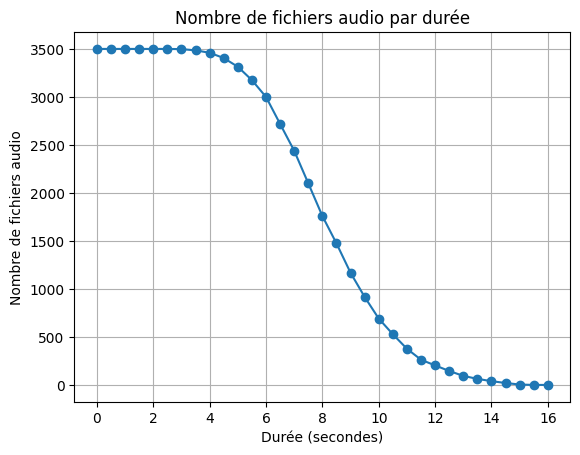

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Générer les valeurs d'absisses et d'ordonnées
x_values = np.arange(0, 16.5, 0.5)
y_values = np.arange(0, len(df_with_age) + 1, 1)

# Calculer le nombre de fichiers audio supérieurs à chaque durée
counts = [len(df_with_age[df_with_age['duration_librosa'] > x]) for x in x_values]

# Afficher le graphique
plt.plot(x_values, counts, marker='o')
plt.xlabel('Durée (secondes)')
plt.ylabel('Nombre de fichiers audio')
plt.title('Nombre de fichiers audio par durée')
plt.grid(True)
plt.show()


In [30]:
# Créer un nouveau DataFrame en excluant les fichiers de moins de 6.5 secondes
df_with_age_minsix = df_with_age.loc[df_with_age['duration_librosa'] >= 6.5]

# Afficher le nouveau DataFrame
print(df_with_age_minsix)

print(df_with_age_minsix.describe())


                              path       age  duration_librosa
23    common_voice_en_37433497.mp3  twenties          7.732245
24    common_voice_en_38006516.mp3  thirties          9.299592
27    common_voice_en_37344370.mp3     teens          7.053061
29    common_voice_en_37511524.mp3  twenties          7.732245
42    common_voice_en_37673682.mp3  twenties          9.142857
...                            ...       ...               ...
4027  common_voice_en_38016052.mp3  thirties          8.359184
4028  common_voice_en_38017871.mp3  thirties          7.471020
4029  common_voice_en_38017939.mp3  thirties          8.515918
4031  common_voice_en_38018072.mp3  thirties          8.359184
4032  common_voice_en_38018460.mp3  thirties          7.732245

[2715 rows x 3 columns]
       duration_librosa
count       2715.000000
mean           9.007886
std            1.784151
min            6.530612
25%            7.575510
50%            8.672653
75%           10.083265
max           15.307755


In [31]:
# Afficher la répartition des catégories d'âge du nouveau df
age_distribution = df_with_age_minsix['age'].value_counts()

# Afficher le résultat
print(age_distribution)

age
thirties     1370
twenties      657
fifties       401
fourties      103
teens          89
sixties        81
seventies      10
nineties        4
Name: count, dtype: int64


In [40]:
import librosa
import numpy as np

# Fonction pour obtenir la durée réelle d'un fichier audio
def get_actual_duration(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return librosa.get_duration(y=y, sr=sr)

# Assurez-vous que df_with_age_minsix existe et n'est pas vide
if not df_with_age_minsix.empty:
    # Mettre à jour les durées dans df_with_age_minsix
    df_with_age_minsix['duration_librosa'] = df_with_age_minsix['path'].apply(lambda x: get_actual_duration(os.path.join(source_directory, x)))

    # Afficher le DataFrame mis à jour
    print("DataFrame mis à jour avec les durées réelles:")
    print(df_with_age_minsix)
else:
    print("Le DataFrame 'df_with_age_minsix' est vide.")



DataFrame mis à jour avec les durées réelles:
                              path       age  duration_librosa
23    common_voice_en_37433497.mp3  twenties             5.328
24    common_voice_en_38006516.mp3  thirties             6.408
27    common_voice_en_37344370.mp3     teens             4.860
29    common_voice_en_37511524.mp3  twenties             5.328
42    common_voice_en_37673682.mp3  twenties             6.300
...                            ...       ...               ...
4027  common_voice_en_38016052.mp3  thirties             5.760
4028  common_voice_en_38017871.mp3  thirties             5.148
4029  common_voice_en_38017939.mp3  thirties             5.868
4031  common_voice_en_38018072.mp3  thirties             5.760
4032  common_voice_en_38018460.mp3  thirties             5.328

[2715 rows x 3 columns]


C:\Users\axlco\AppData\Local\Temp\ipykernel_26288\1916453523.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_age_minsix['duration_librosa'] = df_with_age_minsix['path'].apply(lambda x: get_actual_duration(os.path.join(source_directory, x)))


In [41]:
print(df_with_age_minsix.describe())

       duration_librosa
count       2715.000000
mean           6.206997
std            1.229391
min            4.500000
25%            5.220000
50%            5.976000
75%            6.948000
max           10.548000


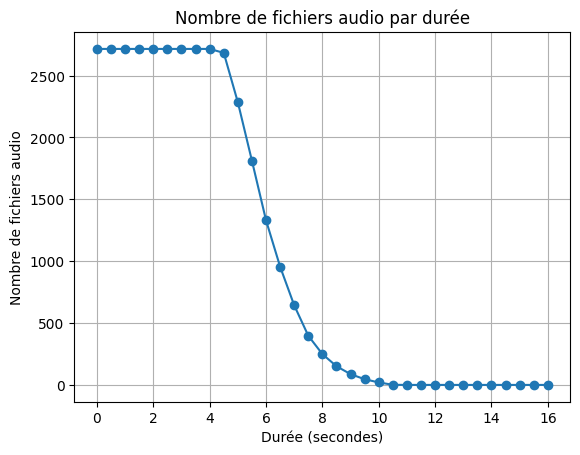

In [42]:

# Générer les valeurs d'absisses et d'ordonnées
x_values = np.arange(0, 16.5, 0.5)
y_values = np.arange(0, len(df_with_age) + 1, 1)

# Calculer le nombre de fichiers audio supérieurs à chaque durée
counts = [len(df_with_age_minsix[df_with_age_minsix['duration_librosa'] > x]) for x in x_values]

# Afficher le graphique
plt.plot(x_values, counts, marker='o')
plt.xlabel('Durée (secondes)')
plt.ylabel('Nombre de fichiers audio')
plt.title('Nombre de fichiers audio par durée')
plt.grid(True)
plt.show()


In [45]:
# Créer un nouveau DataFrame en excluant les fichiers de moins de 6.5 secondes
df_with_age_minfour = df_with_age_minsix.loc[df_with_age_minsix['duration_librosa'] >= 4.5]

# Afficher le nouveau DataFrame
print(df_with_age_minfour)

print(df_with_age_minfour.describe())


                              path       age  duration_librosa
23    common_voice_en_37433497.mp3  twenties             5.328
24    common_voice_en_38006516.mp3  thirties             6.408
27    common_voice_en_37344370.mp3     teens             4.860
29    common_voice_en_37511524.mp3  twenties             5.328
42    common_voice_en_37673682.mp3  twenties             6.300
...                            ...       ...               ...
4027  common_voice_en_38016052.mp3  thirties             5.760
4028  common_voice_en_38017871.mp3  thirties             5.148
4029  common_voice_en_38017939.mp3  thirties             5.868
4031  common_voice_en_38018072.mp3  thirties             5.760
4032  common_voice_en_38018460.mp3  thirties             5.328

[2715 rows x 3 columns]
       duration_librosa
count       2715.000000
mean           6.206997
std            1.229391
min            4.500000
25%            5.220000
50%            5.976000
75%            6.948000
max           10.548000


Nom du fichier audio aléatoire: common_voice_en_37478079.mp3


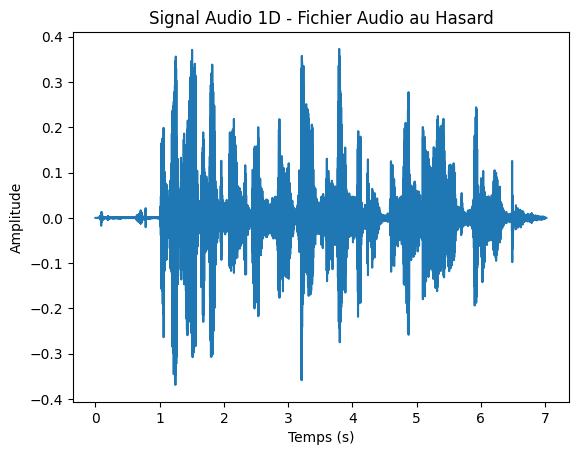

Durée de l'audio selon librosa.get_duration: 7.02 secondes
Durée dans df_with_age_minfour: 7.02 secondes
Les durées concordent.


In [49]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import random

# Sélectionner un fichier audio au hasard depuis df_with_age_minfour
random_row = df_with_age_minfour.sample(n=1)
random_audio_file = random_row['path'].values[0]
print("Nom du fichier audio aléatoire:", random_audio_file)

# Chemin complet du fichier audio
file_path_random = os.path.join(source_directory, random_audio_file)

# Fonction pour charger le fichier audio et obtenir le signal sous forme de vecteur 1D
def load_audio(file_path):
    # Chargement du fichier audio
    y, sr = librosa.load(file_path, sr=None)  # Ajout de sr=None pour obtenir le taux d'échantillonnage
    return y, sr

# Utiliser la fonction load_audio pour obtenir le signal audio
audio_signal_random, sr_random = load_audio(file_path_random)

# Affichage du signal audio
plt.plot(np.arange(len(audio_signal_random)) / sr_random, audio_signal_random)
plt.title('Signal Audio 1D - Fichier Audio au Hasard')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()

# Obtenir la durée de l'audio directement à partir de librosa.get_duration
duration_random = librosa.get_duration(y=audio_signal_random, sr=sr_random)
print("Durée de l'audio selon librosa.get_duration:", duration_random, "secondes")

# Durée stockée dans df_with_age_minfour
duration_df = random_row['duration_librosa'].values[0]
print("Durée dans df_with_age_minfour:", duration_df, "secondes")

# Comparer les durées
if duration_random == duration_df:
    print("Les durées concordent.")
else:
    print("Attention : Les durées ne concordent pas.")


In [74]:
import librosa
from tqdm import tqdm

output_directory = "C:\\Users\\axlco\\OneDrive - ESME\\ESME Sudria\\5 ème année\\Projet\\samples_with_age"

def preprocess_audio(file_path, duration=4.5):
    # Charger le fichier audio avec Librosa
    audio, sr = librosa.load(file_path, duration=duration)

    return audio

X = []  # Liste pour stocker les vecteurs 1D des signaux audio

for idx in tqdm(range(len(df_with_age_minfour)), desc='Traitement des signaux audio', colour='white'):
    file_name = df_with_age_minfour.iloc[idx]['path']
    filepath = os.path.join(output_directory, file_name)

    # Appliquer la fonction de prétraitement
    audio_signal = preprocess_audio(filepath)

    # Ajouter le vecteur 1D à la liste X
    X.append(audio_signal)


Traitement des signaux audio: 100%|██████████| 2715/2715 [00:30<00:00, 90.16it/s]


In [75]:
print(X)

import numpy as np

# Convertir la liste X en un tableau NumPy
X_array = np.array(X)

# Afficher des informations sur le tableau
print("Taille du tableau X:", X_array.shape)
print("Dimension du tableau X:", X_array.ndim)
print("Type de données du tableau X:", X_array.dtype)


[array([ 6.1338284e-18,  1.8022222e-18, -6.6740478e-19, ...,
       -5.3046562e-04, -5.8366789e-04, -6.1327429e-04], dtype=float32), array([ 2.7446386e-18,  1.0632307e-18,  2.4656161e-18, ...,
       -4.9397081e-02, -4.7094252e-02, -4.6912827e-02], dtype=float32), array([1.4946691e-12, 3.4798384e-12, 2.6199373e-12, ..., 1.0871370e-03,
       6.1189081e-04, 7.4810954e-04], dtype=float32), array([ 1.1302134e-13, -2.6551759e-13, -2.1952701e-13, ...,
        8.7477528e-03,  9.6698832e-03,  1.2848030e-02], dtype=float32), array([-1.3273585e-11,  2.1138148e-12, -9.7609776e-12, ...,
       -8.1681609e-03, -1.9575082e-02, -4.0368967e-02], dtype=float32), array([ 5.6924394e-18,  4.5003779e-18,  1.8272041e-17, ...,
       -2.3166485e-04, -3.9947839e-04, -8.5071556e-04], dtype=float32), array([-1.0272766e-12,  3.7352127e-12,  2.9941986e-12, ...,
        2.4076522e-04,  2.7117814e-04,  3.6371525e-04], dtype=float32), array([ 3.2301127e-14, -6.3538411e-13,  4.7845712e-13, ...,
        4.8013786e-05

In [76]:
# Extraire les labels de l'âge de df_with_age_minfour
y = df_with_age_minfour['age'].tolist()

print(y)

print(len(y))

['twenties', 'thirties', 'teens', 'twenties', 'twenties', 'fourties', 'thirties', 'twenties', 'thirties', 'twenties', 'fourties', 'twenties', 'teens', 'thirties', 'twenties', 'teens', 'thirties', 'twenties', 'twenties', 'fifties', 'thirties', 'fifties', 'fifties', 'twenties', 'twenties', 'teens', 'fifties', 'twenties', 'twenties', 'twenties', 'fourties', 'twenties', 'twenties', 'twenties', 'twenties', 'fifties', 'twenties', 'teens', 'twenties', 'thirties', 'twenties', 'twenties', 'thirties', 'thirties', 'thirties', 'sixties', 'sixties', 'twenties', 'twenties', 'thirties', 'thirties', 'twenties', 'twenties', 'twenties', 'fifties', 'fifties', 'thirties', 'thirties', 'fourties', 'fifties', 'fifties', 'thirties', 'thirties', 'twenties', 'thirties', 'thirties', 'thirties', 'thirties', 'sixties', 'sixties', 'twenties', 'twenties', 'fourties', 'fourties', 'twenties', 'twenties', 'thirties', 'thirties', 'twenties', 'twenties', 'teens', 'teens', 'twenties', 'twenties', 'thirties', 'thirties', '

In [77]:
from sklearn.preprocessing import LabelEncoder

# Instancier le LabelEncoder
label_encoder = LabelEncoder()

# Appliquer l'encodage des étiquettes pour les labels d'âge
y_age_encoded = label_encoder.fit_transform(y)

print(y_age_encoded)


# Afficher les classes attribuées après l'encodage des étiquettes d'âge
age_classes = label_encoder.classes_
print("Classes d'âge après encodage:", age_classes)

# Afficher la correspondance entre les labels originaux et les classes attribuées
label_class_mapping={'fifties': 5, 'fourties': 4, 'nineties': 9, 'seventies': 7, 'sixties': 6, 'teens': 1, 'thirties': 3, 'twenties': 2, 'eighties': 8}
print("Mapping des labels originaux aux classes attribuées:", label_class_mapping)


[7 6 5 ... 6 6 6]
Classes d'âge après encodage: ['fifties' 'fourties' 'nineties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']
Mapping des labels originaux aux classes attribuées: {'fifties': 5, 'fourties': 4, 'nineties': 9, 'seventies': 7, 'sixties': 6, 'teens': 1, 'thirties': 3, 'twenties': 2, 'eighties': 8}


In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Supposons que les âges sont dans y
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

from sklearn.preprocessing import LabelEncoder

# Créer un label encoder
label_encoder = LabelEncoder()

# Fit_transform sur les classes dans y_encoded
y_encoded = label_encoder.fit_transform(y)

# Convertir en one-hot encoding
y_encoded_categorical = to_categorical(y_encoded, num_classes=9)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_categorical, test_size=0.2, random_state=42)



X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


print(X_train)
# Créer le modèle CNN 1D pour la classification d'âge
cnn_model_classification = Sequential()

# Ajouter une couche de convolution avec une fonction d'activation relu
cnn_model_classification.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(99225, 1)))

# Ajouter une couche de pooling
cnn_model_classification.add(MaxPooling1D(pool_size=2))

# Ajouter une autre couche de convolution et de pooling
cnn_model_classification.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
cnn_model_classification.add(MaxPooling1D(pool_size=2))

# Aplatir les données pour les passer à une couche Dense
cnn_model_classification.add(Flatten())

# Ajouter une couche Dense avec une fonction d'activation relu
cnn_model_classification.add(Dense(64, activation='relu'))

# Ajouter la couche de sortie avec une fonction d'activation softmax pour la classification
cnn_model_classification.add(Dense(9, activation='softmax'))

# Compiler le modèle
cnn_model_classification.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Afficher un résumé du modèle
cnn_model_classification.summary()

# Entraîner le modèle
history_classification = cnn_model_classification.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# Afficher les performances
print("Performances sur l'ensemble d'entraînement :")
train_loss, train_accuracy = cnn_model_classification.evaluate(X_train, y_train, verbose=0)
print(f"Loss: {train_loss}, Accuracy: {train_accuracy}")

print("\nPerformances sur l'ensemble de test :")
test_loss, test_accuracy = cnn_model_classification.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {test_loss}, Accuracy: {test_accuracy}")


[[[ 1.04893637e-11]
  [-1.17905789e-11]
  [ 1.08451486e-11]
  ...
  [ 3.40931793e-03]
  [ 8.26327782e-03]
  [-6.30947296e-03]]

 [[ 1.22302017e-12]
  [ 6.53065004e-13]
  [ 1.80313555e-12]
  ...
  [-4.49985782e-05]
  [ 1.37993426e-04]
  [ 3.55371798e-04]]

 [[ 1.85988594e-13]
  [-1.31270727e-13]
  [ 4.79626240e-14]
  ...
  [ 6.25267327e-02]
  [-4.47465293e-03]
  [-4.50414978e-02]]

 ...

 [[-3.28991852e-13]
  [ 1.23511130e-12]
  [-6.34127082e-14]
  ...
  [ 5.73891215e-03]
  [ 5.49312262e-03]
  [ 5.49979974e-03]]

 [[-4.39012368e-12]
  [ 3.81952239e-12]
  [-1.98053618e-12]
  ...
  [ 3.66672762e-02]
  [ 1.85031854e-02]
  [ 2.02659629e-02]]

 [[ 1.74732061e-17]
  [-5.41254467e-19]
  [ 6.81958509e-19]
  ...
  [-8.31976795e-05]
  [-3.71232949e-04]
  [-3.95671785e-04]]]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 99223, 32)         128       
      

17/17 [==============================] - 7s 392ms/step


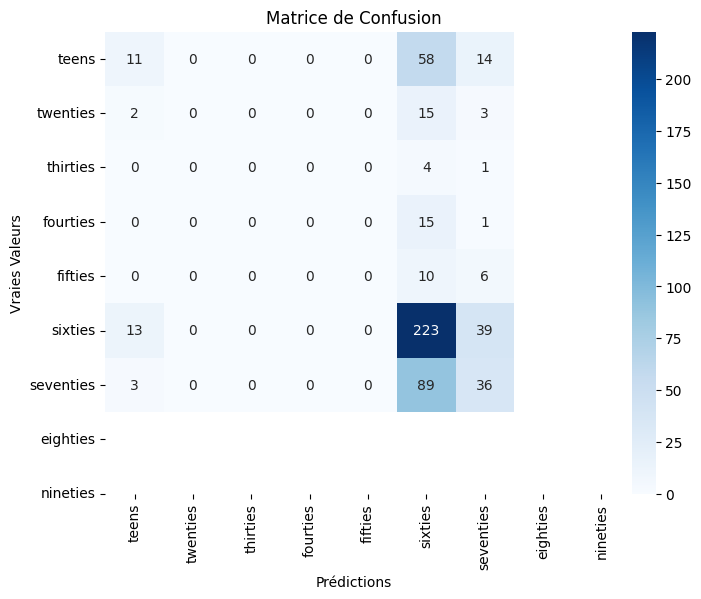

ValueError: Number of classes, 7, does not match size of target_names, 9. Try specifying the labels parameter

In [72]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# ... (votre code pour définir et entraîner le modèle)

# Évaluation du modèle sur l'ensemble de test
y_pred = cnn_model_classification.predict(X_test)

# Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Labels des classes
class_labels = ["teens", "twenties", "thirties", "fourties", "fifties", "sixties", "seventies", "eighties", "nineties"]

# Afficher la matrice de confusion avec seaborn
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Valeurs')
plt.show()

# Afficher le rapport de classification
class_report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Rapport de classification :")
print(class_report)

# ... (le reste du code pour les graphiques de perte et de précision)


# Afficher la perte et la précision au fil des époques
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_classification.history['loss'], label='Entraînement')
plt.plot(history_classification.history['val_loss'], label='Validation')
plt.title('Perte (Loss) au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Perte (Loss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_classification.history['accuracy'], label='Entraînement')
plt.plot(history_classification.history['val_accuracy'], label='Validation')
plt.title('Précision (Accuracy) au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Précision (Accuracy)')
plt.legend()

plt.tight_layout()
plt.show()


In [73]:
# Afficher la répartition des catégories d'âge du nouveau df
age_distribution = df_with_age_minfour['age'].value_counts()

# Afficher le résultat
print(age_distribution)

age
thirties     1370
twenties      657
fifties       401
fourties      103
teens          89
sixties        81
seventies      10
nineties        4
Name: count, dtype: int64
